#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto Módulo 2 Limpieza y preprocesado de datos

## Introducción

En la vida laboral de un científico de datos, la tarea más importante es realizar un buen análisis. Sin un entendimiento del problema, resultará difícil aplicar un buen modelo para su resolución. Por ello, ahora que comprendiste las técnicas revisadas a lo largo de este módulo, serás capaz de aplicar el tratamiento necesario de un conjunto de datos para su explotación.

## Demo

Este documento te servirá como inspiración para crear el tuyo: https://drive.google.com/file/d/1LKiMVyepbdTBK_Fs_9e6-y2ybB0Kem-Y/view?usp=sharing

## ¿Qué construirás?

Un análisis sobre un conjunto de datos para su posterior modelado. Este proyecto se dividirá en 4 secciones:

*   Análisis Exploratorio
*   Limpieza de datos
*   Procesamiento de datos
*   Reducción de dimensiones

## Criterios de evaluación

* Análisis Exploratorio: Calidad del análisis, entendimiento de las variables y estudio de las correlaciones con el objetivo. (25pts)
  - Excelente: Comprende la multicolinealidad entre las variables y señala gráficamente los valores atípicos en las distribuciones.
  - Suficiente: Comprende la relevancia de las variables e identifica las variables más significativas y cuales tienen mayor relación con el objetivo.

*   Limpieza de datos: Eliminación de faltantes, duplicados y atípicos de manera correcta, eligiendo el mejor modo para imputar valores faltantes. (25pts)

  - Excelente: Elimina los valores atí­picos y los imputa eligiendo el mejor modo para imputar valores faltantes.
  - Suficiente: Elimina las variables que no cumplen con el criterio de completitud y se imputan los valores restantes sin justificar o comprar el método de imputación.


*   Procesamiento de datos: Correcto uso de transformadores, justificando el porque se eligió uno sobre algún otro. (25pts)

  - Excelente: Transforma las variables de acuerdo a su naturaleza utilizando distintos métodos para escalar dependiendo de los valores de cada variable.
  - Transforma las variables categóricas y variables continuas.

*   Reducción de dimensiones: Selección de la mejor técnica para reducir las dimensiones, además de justificar el porque se esta reduciendo a cierto número sobre cualquier otro. (25pts)

  - Excelente: Elige el óptimo número de dimensiones de acuerdo a varias técnicas, justificando el porque se eligió el número de dimensiones final.
  - Suficiente: Reduce el conjunto de datos propuesto para una correcta reducción de nuestro set de datos.


## Objetivos

El participante:

* Realizará un correcto análisis y tratamiento de datos, el cuál le permita preparar y limpiar los datos de la forma más adecuada para utilizarlos posteriormente en un modelo.
* Comprenderá la relevacia de las variables e identificará las variables más significativas que tienen mayor relación con el objetivo.
* Comprenderá la multicolinealidad entre las variables y señalará gráficamente los valores atípicos en las distribuciones.
* Eliminará valores faltantes, duplicados y atípicos de manera correcta, usando el modo más adecuado para su objetivo.
* Usará de forma adecuada los transformadores utilizando distintos métodos para escalar en función de los valores de cada variable.
* Hará una correcta reducción del set de datos y elegirá el número óptimo de dimensiones mediante diversas técnicas.

¡Es momento de ponerte a prueba y descubrir todo lo que eres capaz!

Comienza por analizar cada uno de los apartados que te solicitamos para este proyecto y trata de usar todas las herramientas que aprendiste a lo largo del módulo. Recuerda que el detalle que pongas en cada proceso será tomado en cuenta en tu evaluación, revisa los criterios en la sección de tareas de Teams.

¡Te desemos éxito!

## Conjunto de datos para analizar.
Se tiene información de Lending Club, empresa estadounidense de préstamos con sede en San Francisco, California. En dicha compañía, los prestatarios pueden acceder fácilmente a préstamos con tasas de interés bajas.
El dataset contiene datos de todos los préstamos emitidos durante el periodo 2007-2015, con el estado actual del préstamo (actual, cancelado, completamente pagado) y la información de pago más reciente.

Las características adicionales incluyen puntajes de crédito, número de consultas financieras y cobros, entre otros.

Puedes descargar la información al hacer clic en el siguiente enlace:https://drive.google.com/file/d/1oxjXn7PkuqeSdQz5dOMXZOJfhJoBlX3T/view?usp=sharing

¡Comencemos!

In [148]:
#Importa las librerías que vayas a usar para tu proyecto, no olvides importar pandas.
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

In [149]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/Bootcamp/dataset_Proyecto_M2.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [151]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [152]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [154]:
df.shape

(887379, 74)

* Nuestro dataset tiene un total de 887879 registros (filas) y 74 variables (columnas)

In [155]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

A continuación se muestra el diccionario de nuestras variables:

- `id`: Identificador único del préstamo.
- `member_id`: Identificador único del miembro (prestatario).
- `loan_amnt`: Monto del préstamo solicitado.
- `funded_amnt`: Monto del préstamo financiado.
- `funded_amnt_inv`: Monto del préstamo financiado por inversores.
- `term`: Plazo del préstamo en meses.
- `int_rate`: Tasa de interés del préstamo.
- `installment`: Cuota mensual a pagar.
- `grade`: Grado de riesgo del préstamo asignado por Lending Club.
- `sub_grade`: Subgrado de riesgo del préstamo asignado por Lending Club.
- `emp_title`: Título laboral del prestatario.
- `emp_length`: Tiempo de empleo en años.
- `home_ownership`: Tipo de propiedad del hogar.
- `annual_inc`: Ingresos anuales del prestatario.
- `verification_status`: Estado de verificación de ingresos del prestatario.
- `issue_d`: Fecha de emisión del préstamo.
- `loan_status`: Estado actual del préstamo.
- `pymnt_plan`: Indica si existe un plan de pago establecido.
- `url`: URL del préstamo en el sitio web de Lending Club.
- `desc`: Descripción del préstamo.
- `purpose`: Propósito del préstamo.
- `title`: Título del préstamo proporcionado por el prestatario.
- `zip_code`: Código postal del prestatario.
- `addr_state`: Estado de residencia del prestatario.
- `dti`: Relación deuda-ingresos del prestatario.
- `delinq_2yrs`: Número de incumplimientos en los últimos 2 años.
- `earliest_cr_line`: Fecha de apertura de la primera línea de crédito.
- `inq_last_6mths`: Número de consultas de crédito en los últimos 6 meses.
- `mths_since_last_delinq`: Meses desde el último incumplimiento.
- `mths_since_last_record`: Meses desde el último registro negativo.
- `open_acc`: Número de cuentas abiertas.
- `pub_rec`: Número de registros públicos.
- `revol_bal`: Saldo total de todas las líneas de crédito renovables.
- `revol_util`: Tasa de utilización de la línea de crédito renovable.
- `total_acc`: Número total de cuentas.
- `initial_list_status`: Estado inicial de la lista del préstamo.
- `out_prncp`: Saldo pendiente del capital original.
- `out_prncp_inv`: Saldo pendiente del capital original para inversores.
- `total_pymnt`: Pago total recibido.
- `total_pymnt_inv`: Pago total recibido por inversores.
- `total_rec_prncp`: Total recibido del principal pagado.
- `total_rec_int`: Total recibido en intereses.
- `total_rec_late_fee`: Total recibido en cargos por mora.
- `recoveries`: Recuperaciones realizadas.
- `collection_recovery_fee`: Tarifa de recuperación de cobranza.
- `last_pymnt_d`: Fecha del último pago recibido.
- `last_pymnt_amnt`: Monto del último pago recibido.
- `next_pymnt_d`: Fecha del próximo pago programado.
- `last_credit_pull_d`: Fecha del último tirón de crédito.
- `collections_12_mths_ex_med`: Número de colecciones en los últimos 12 meses excluyendo las médicas.
- `mths_since_last_major_derog`: Meses desde el último evento adverso importante.
- `policy_code`: Código de política.
- `application_type`: Tipo de aplicación.
- `annual_inc_joint`: Ingresos anuales conjuntos.
- `dti_joint`: Relación deuda-ingresos conjunta.
- `verification_status_joint`: Estado de verificación de ingresos conjuntos.
- `acc_now_delinq`: Número de cuentas actualmente morosas.
- `tot_coll_amt`: Monto total de cuentas en cobro judicial.
- `tot_cur_bal`: Saldo total actual de todas las cuentas.
- `open_acc_6m`: Número de cuentas abiertas en los últimos 6 meses.
- `open_il_6m`: Número de cuentas abiertas en los últimos 6 meses de tipo instalación.
- `open_il_12m`: Número de cuentas abiertas en los últimos 12 meses de tipo instalación.
- `open_il_24m`: Número de cuentas abiertas en los últimos 24 meses de tipo instalación.
- `mths_since_rcnt_il`: Meses desde la cuenta instalada más reciente.
- `total_bal_il`: Saldo total de cuentas de instalación.
- `il_util`: Utilización de la cuenta de instalación.
- `open_rv_12m`: Número de cuentas abiertas en los últimos 12 meses de tipo renovación.
- `open_rv_24m`: Número de cuentas abiertas en los últimos 24 meses de tipo renovación.
- `max_bal_bc`: Saldo máximo de la cuenta de la línea de crédito renovable.
- `all_util`: Utilización de todas las cuentas.
- `total_rev_hi_lim`: Límite total de línea de crédito renovable.
- `inq_fi`: Número de consultas financieras recientes.
- `total_cu_tl`: Número total de líneas de crédito.
- `inq_last_12m`: Número de consultas en los últimos 12 meses.

Nuestra variable objetivo será "loan_status", por lo tanto a continuación vamos a crear un nuevo dataset eliminando las variales que se consideran que no serán de utilidad.

In [156]:
# variables_elim son las variables que se eliminan
variables_elim = ['id', 'member_id', 'url', 'desc', 'zip_code', 'addr_state', 'pymnt_plan', 'policy_code', 'application_type', 'issue_d',
                  'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'verification_status_joint', 'verification_status', 'earliest_cr_line']

# Nuevo DataFrame (df2) eliminando las columnas señaladas
df2 = df.drop(columns=variables_elim)

In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    887379 non-null  float64
 1   funded_amnt                  887379 non-null  float64
 2   funded_amnt_inv              887379 non-null  float64
 3   term                         887379 non-null  object 
 4   int_rate                     887379 non-null  float64
 5   installment                  887379 non-null  float64
 6   grade                        887379 non-null  object 
 7   sub_grade                    887379 non-null  object 
 8   emp_title                    835917 non-null  object 
 9   emp_length                   842554 non-null  object 
 10  home_ownership               887379 non-null  object 
 11  annual_inc                   887375 non-null  float64
 12  loan_status                  887379 non-null  object 
 13 

In [158]:
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Fully Paid,credit_card,Computer,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Charged Off,car,bike,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Fully Paid,small_business,real estate business,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Fully Paid,other,personel,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Current,other,Personal,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Parte 1
Dado el _dataset_:

* Identifica el tipo de datos de cada variable y verifica la completitud.
* Determina las variables que son continuas, discretas y la variable objetivo.

> Puedes contar los valores dentro de una variable y utilizar las funciones que desees para cumplir estos objetivos; mientras más completo sea el EDA, mejor puntaje obtendrás.



> Recomendaciones: usa funciones como `.info`, `.head` y `.duplicated`.



In [159]:
#1.1 - Identificar el tipo de datos de cada variable
pd.set_option("display.max_rows",None)
df2.dtypes

loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
loan_status                     object
purpose                         object
title                           object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status      

In [160]:
#1.2 - Verificar la completitud.
completitud = pd.DataFrame(df2.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total_dfaltantes"})
completitud["completitud"] = (1 - completitud["total_dfaltantes"] / df2.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud


,columna,total_dfaltantes,completitud
0,dti_joint,886870,0.057360
1,annual_inc_joint,886868,0.057585
2,il_util,868762,2.097976
3,mths_since_rcnt_il,866569,2.345108
4,inq_last_12m,866007,2.408441
5,open_acc_6m,866007,2.408441
6,total_cu_tl,866007,2.408441
7,open_il_6m,866007,2.408441
8,open_il_12m,866007,2.408441
9,total_bal_il,866007,2.408441


In [161]:
#2.1 - Determina las variables que son continuas, discretas y la variable objetivo

**VARIABLES CONTINUAS:**

loan_amnt: Monto del préstamo solicitado.

funded_amnt: Monto del préstamo financiado.

funded_amnt_inv: Monto del préstamo financiado por inversores.

int_rate: Tasa de interés del préstamo.

installment: Cuota mensual a pagar.

annual_inc: Ingresos anuales del prestatario.

dti: Relación deuda-ingresos del prestatario.

delinq_2yrs: Número de incumplimientos en los últimos 2 años.

inq_last_6mths: Número de consultas de crédito en los últimos 6 meses.

mths_since_last_delinq: Meses desde el último incumplimiento.

mths_since_last_record: Meses desde el último registro negativo.

open_acc: Número de cuentas abiertas.

pub_rec: Número de registros públicos.

revol_bal: Saldo total de todas las líneas de crédito renovables.

revol_util: Tasa de utilización de la línea de crédito renovable.

total_acc: Número total de cuentas.

out_prncp: Saldo pendiente del capital original.

out_prncp_inv: Saldo pendiente del capital original para inversores.

total_pymnt: Pago total recibido.

total_pymnt_inv: Pago total recibido por inversores.

total_rec_prncp: Total recibido del principal pagado.

total_rec_int: Total recibido en intereses.

total_rec_late_fee: Total recibido en cargos por mora.

recoveries: Recuperaciones realizadas.

collection_recovery_fee: Tarifa de recuperación de cobranza.

last_pymnt_amnt: Monto del último pago recibido.

collections_12_mths_ex_med: Número de colecciones en los últimos 12 meses excluyendo las médicas.

mths_since_last_major_derog: Meses desde el último evento adverso importante.

annual_inc_joint: Ingresos anuales conjuntos.

dti_joint: Relación deuda-ingresos conjunta.

acc_now_delinq: Número de cuentas actualmente morosas.

tot_coll_amt: Monto total de cuentas en cobro judicial.

tot_cur_bal: Saldo total actual de todas las cuentas.

open_acc_6m: Número de cuentas abiertas en los últimos 6 meses.

open_il_6m: Número de cuentas abiertas en los últimos 6 meses de
tipo instalación.

open_il_12m: Número de cuentas abiertas en los últimos 12 meses de tipo instalación.

open_il_24m: Número de cuentas abiertas en los últimos 24 meses de tipo instalación.

mths_since_rcnt_il: Meses desde la cuenta instalada más reciente.

total_bal_il: Saldo total de cuentas de instalación.

il_util: Utilización de la cuenta de instalación.

open_rv_12m: Número de cuentas abiertas en los últimos 12 meses de tipo renovación.

open_rv_24m: Número de cuentas abiertas en los últimos 24 meses de
tipo renovación.

max_bal_bc: Saldo máximo de la cuenta de la línea de crédito renovable.

all_util: Utilización de todas las cuentas.

total_rev_hi_lim: Límite total de línea de crédito renovable.

inq_fi: Número de consultas financieras recientes.

total_cu_tl: Número total de líneas de crédito.

inq_last_12m: Número de consultas en los últimos 12 meses.






**VARIABLES DISCRETAS**:

term: Plazo del préstamo en meses.



emp_length: Tiempo de empleo en años.



verification_status: Estado de verificación de ingresos del prestatario.














**VARIABLES CATEGÓRICAS:**

grade: Grado de riesgo del préstamo asignado por Lending Club.

sub_grade: Subgrado de riesgo del préstamo asignado por Lending Club.

emp_title: Título laboral del prestatario.

home_ownership: Tipo de propiedad del hogar.

purpose: Propósito del préstamo.

title: Título del préstamo proporcionado por el prestatario.

initial_list_status: Estado inicial de la lista del préstamo.

**VARIABLE OBJETIVO**:

loan_status: Estado actual del préstamo.

In [162]:
#Creamos una función que nos permita agregar sufijo al nombre de nuestras columnas

def rename_cols(df2,cols,prefix):
  new_feats=[prefix+col for col in cols]
  df2=df2.rename(columns=dict(zip(cols,new_feats)))
  return df2

d_feats=['term', 'emp_length', 'verification_status']
c_feats=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
         'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
         'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
         'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
         'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
         'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
         'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
obj=["loan_status"]

df2=rename_cols(df2,d_feats,"d_")
df2=rename_cols(df2,c_feats,"c_")
df2=rename_cols(df2,obj,"obj_")


In [163]:
# Eliminar la palabra 'months' de los valores de 'd_term'
df2['d_term'] = df2['d_term'].apply(lambda x: x[:-7])

#Cambiar de nombre 'd_term' a 'd_term_months'
df2.rename(columns={"d_term":"d_term_months"},inplace=True)

In [164]:
#transformar todos los valores de 'd_term_months' a int64

df2['d_term_months'] = df2['d_term_months'].astype('int64')


In [165]:
df2['d_term_months'].dtypes

dtype('int64')

In [166]:
df2.columns

Index(['c_loan_amnt', 'c_funded_amnt', 'c_funded_amnt_inv', 'd_term_months',
       'c_int_rate', 'c_installment', 'grade', 'sub_grade', 'emp_title',
       'd_emp_length', 'home_ownership', 'c_annual_inc', 'obj_loan_status',
       'purpose', 'title', 'c_dti', 'c_delinq_2yrs', 'c_inq_last_6mths',
       'c_mths_since_last_delinq', 'c_mths_since_last_record', 'c_open_acc',
       'c_pub_rec', 'c_revol_bal', 'c_revol_util', 'c_total_acc',
       'initial_list_status', 'c_out_prncp', 'c_out_prncp_inv',
       'c_total_pymnt', 'c_total_pymnt_inv', 'c_total_rec_prncp',
       'c_total_rec_int', 'c_total_rec_late_fee', 'c_recoveries',
       'c_collection_recovery_fee', 'c_last_pymnt_amnt',
       'c_collections_12_mths_ex_med', 'c_mths_since_last_major_derog',
       'c_annual_inc_joint', 'c_dti_joint', 'c_acc_now_delinq',
       'c_tot_coll_amt', 'c_tot_cur_bal', 'c_open_acc_6m', 'c_open_il_6m',
       'c_open_il_12m', 'c_open_il_24m', 'c_mths_since_rcnt_il',
       'c_total_bal_il', 'c_i

In [167]:
df2.head()

,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,d_term_months,c_int_rate,c_installment,grade,sub_grade,emp_title,d_emp_length,home_ownership,c_annual_inc,obj_loan_status,purpose,title,c_dti,c_delinq_2yrs,c_inq_last_6mths,c_mths_since_last_delinq,c_mths_since_last_record,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_mths_since_last_major_derog,c_annual_inc_joint,c_dti_joint,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_open_acc_6m,c_open_il_6m,c_open_il_12m,c_open_il_24m,c_mths_since_rcnt_il,c_total_bal_il,c_il_util,c_open_rv_12m,c_open_rv_24m,c_max_bal_bc,c_all_util,c_total_rev_hi_lim,c_inq_fi,c_total_cu_tl,c_inq_last_12m
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Fully Paid,credit_card,Computer,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Charged Off,car,bike,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Fully Paid,small_business,real estate business,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Fully Paid,other,personel,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Current,other,Personal,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df2['obj_loan_status'].value_counts()

obj_loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

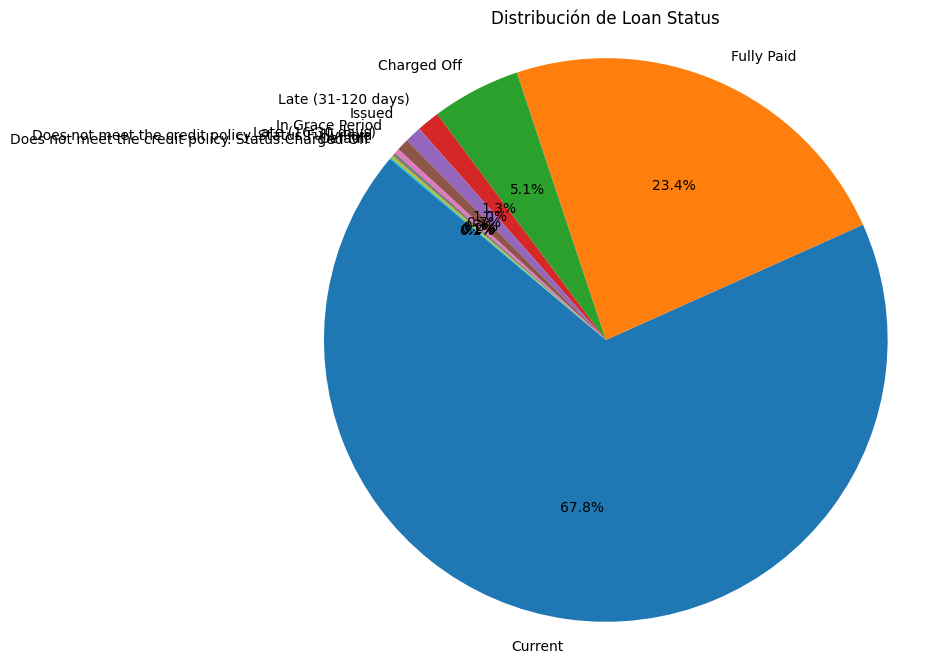

In [169]:
# Contar el número de préstamos en cada estado
variable_obj_counts = df2['obj_loan_status'].value_counts()

# Crear un gráfico de torta de la distribución de Loan Status
plt.figure(figsize=(8, 8))
plt.pie(variable_obj_counts, labels=variable_obj_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Loan Status')
plt.axis('equal')
plt.show()

## Parte 2
* Elimina los datos faltantes o duplicados con el método que sea más conveniente y justifica tu elección.

* Elimina las variables cuyo valor de completitud sea menor a 80; después, identifica y modifica aquellos valores atípicos (_outliers_).

In [170]:
#1.1- eliminar duplicados

# Encontrar filas duplicadas
duplicados = df2.duplicated()

# Imprimir las filas duplicadas
print("Filas duplicadas:")
print(df2[duplicados])

Filas duplicadas:
Empty DataFrame
Columns: [c_loan_amnt, c_funded_amnt, c_funded_amnt_inv, d_term_months, c_int_rate, c_installment, grade, sub_grade, emp_title, d_emp_length, home_ownership, c_annual_inc, obj_loan_status, purpose, title, c_dti, c_delinq_2yrs, c_inq_last_6mths, c_mths_since_last_delinq, c_mths_since_last_record, c_open_acc, c_pub_rec, c_revol_bal, c_revol_util, c_total_acc, initial_list_status, c_out_prncp, c_out_prncp_inv, c_total_pymnt, c_total_pymnt_inv, c_total_rec_prncp, c_total_rec_int, c_total_rec_late_fee, c_recoveries, c_collection_recovery_fee, c_last_pymnt_amnt, c_collections_12_mths_ex_med, c_mths_since_last_major_derog, c_annual_inc_joint, c_dti_joint, c_acc_now_delinq, c_tot_coll_amt, c_tot_cur_bal, c_open_acc_6m, c_open_il_6m, c_open_il_12m, c_open_il_24m, c_mths_since_rcnt_il, c_total_bal_il, c_il_util, c_open_rv_12m, c_open_rv_24m, c_max_bal_bc, c_all_util, c_total_rev_hi_lim, c_inq_fi, c_total_cu_tl, c_inq_last_12m]
Index: []


- Nuestro dataframe "df2" no tiene registros duplicados.

In [171]:
#Confirmar si variables 'c_loan_amnt' y 'c_funded_amnt' tienen los mismos valores
def columnas_iguales(df2, c_loan_amnt, c_funded_amnt):
    return df2['c_loan_amnt'].equals(df2['c_funded_amnt'])


# Verificar si las columnas 'columna1' y 'columna2' tienen los mismos valores
print("¿columna1 y columna2 tienen los mismos valores?:", columnas_iguales(df2, 'c_loan_amnt', 'c_funded_amnt'))

¿columna1 y columna2 tienen los mismos valores?: False


- Observando el dataframe "df2" tuve la duda si 'c_loan_amnt' y 'c_funded_amnt' tenían los mismos valores para así dejar solo uno y disminuir la información redundante de "df2", pero no son iguales.

In [172]:
#1.2- eliminar datos faltantes

# Identificar y mostrar columnas con valores faltantes y su porcentaje
porcentaje_faltantes = df2.isnull().mean() * 100
columnas_con_faltantes = porcentaje_faltantes[porcentaje_faltantes > 0]
print(columnas_con_faltantes.sort_values(ascending=True))

c_annual_inc                      0.000451
c_acc_now_delinq                  0.003268
c_delinq_2yrs                     0.003268
c_inq_last_6mths                  0.003268
c_total_acc                       0.003268
c_open_acc                        0.003268
c_pub_rec                         0.003268
c_collections_12_mths_ex_med      0.016340
title                             0.017242
c_revol_util                      0.056571
d_emp_length                      5.051393
emp_title                         5.799326
c_total_rev_hi_lim                7.919502
c_tot_coll_amt                    7.919502
c_tot_cur_bal                     7.919502
c_mths_since_last_delinq         51.197065
c_mths_since_last_major_derog    75.015974
c_mths_since_last_record         84.555303
c_inq_fi                         97.591559
c_all_util                       97.591559
c_max_bal_bc                     97.591559
c_open_rv_24m                    97.591559
c_open_rv_12m                    97.591559
c_total_bal

- Las columnas con un con más de 97% de datos faltantes es muy dificil recuperarlas, por lo tanto vamos a eliminarlas de nuestro dataframe.

In [173]:
#Borrar columnas con +97% de faltantes
df2 = df2.drop(columns=columnas_con_faltantes[columnas_con_faltantes > 97].index)
df2.columns

Index(['c_loan_amnt', 'c_funded_amnt', 'c_funded_amnt_inv', 'd_term_months',
       'c_int_rate', 'c_installment', 'grade', 'sub_grade', 'emp_title',
       'd_emp_length', 'home_ownership', 'c_annual_inc', 'obj_loan_status',
       'purpose', 'title', 'c_dti', 'c_delinq_2yrs', 'c_inq_last_6mths',
       'c_mths_since_last_delinq', 'c_mths_since_last_record', 'c_open_acc',
       'c_pub_rec', 'c_revol_bal', 'c_revol_util', 'c_total_acc',
       'initial_list_status', 'c_out_prncp', 'c_out_prncp_inv',
       'c_total_pymnt', 'c_total_pymnt_inv', 'c_total_rec_prncp',
       'c_total_rec_int', 'c_total_rec_late_fee', 'c_recoveries',
       'c_collection_recovery_fee', 'c_last_pymnt_amnt',
       'c_collections_12_mths_ex_med', 'c_mths_since_last_major_derog',
       'c_acc_now_delinq', 'c_tot_coll_amt', 'c_tot_cur_bal',
       'c_total_rev_hi_lim'],
      dtype='object')

In [174]:
porcentaje_faltantes = df2.isnull().mean() * 100
columnas_con_faltantes = porcentaje_faltantes[porcentaje_faltantes > 0]
print(columnas_con_faltantes.sort_values(ascending=True))

c_annual_inc                      0.000451
c_open_acc                        0.003268
c_delinq_2yrs                     0.003268
c_inq_last_6mths                  0.003268
c_acc_now_delinq                  0.003268
c_total_acc                       0.003268
c_pub_rec                         0.003268
c_collections_12_mths_ex_med      0.016340
title                             0.017242
c_revol_util                      0.056571
d_emp_length                      5.051393
emp_title                         5.799326
c_tot_coll_amt                    7.919502
c_tot_cur_bal                     7.919502
c_total_rev_hi_lim                7.919502
c_mths_since_last_delinq         51.197065
c_mths_since_last_major_derog    75.015974
c_mths_since_last_record         84.555303
dtype: float64


- Tenemos 3 variables relacionadas entre sí que brindan información de meses transcurridos desde eventos de incumplimiento, negativos o adversos ('c_mths_since_last_delinq', 'c_mths_since_last_major_derog', 'c_mths_since_last_record').
- Podríamos relacionar estas variables para llenar datos faltantes, pero vemos que la que tiene menor cantidad de missing values es de más del 50%, por lo tanto no hay suficiententes registros y no serán consideradas.

In [175]:
df2 = df2.drop(['c_mths_since_last_delinq', 'c_mths_since_last_major_derog', 'c_mths_since_last_record'], axis=1)
df2.columns

Index(['c_loan_amnt', 'c_funded_amnt', 'c_funded_amnt_inv', 'd_term_months',
       'c_int_rate', 'c_installment', 'grade', 'sub_grade', 'emp_title',
       'd_emp_length', 'home_ownership', 'c_annual_inc', 'obj_loan_status',
       'purpose', 'title', 'c_dti', 'c_delinq_2yrs', 'c_inq_last_6mths',
       'c_open_acc', 'c_pub_rec', 'c_revol_bal', 'c_revol_util', 'c_total_acc',
       'initial_list_status', 'c_out_prncp', 'c_out_prncp_inv',
       'c_total_pymnt', 'c_total_pymnt_inv', 'c_total_rec_prncp',
       'c_total_rec_int', 'c_total_rec_late_fee', 'c_recoveries',
       'c_collection_recovery_fee', 'c_last_pymnt_amnt',
       'c_collections_12_mths_ex_med', 'c_acc_now_delinq', 'c_tot_coll_amt',
       'c_tot_cur_bal', 'c_total_rev_hi_lim'],
      dtype='object')

In [176]:
porcentaje_faltantes = df2.isnull().mean() * 100
columnas_con_faltantes = porcentaje_faltantes[porcentaje_faltantes > 0]
print(columnas_con_faltantes.sort_values(ascending=True))

c_annual_inc                    0.000451
c_delinq_2yrs                   0.003268
c_inq_last_6mths                0.003268
c_open_acc                      0.003268
c_pub_rec                       0.003268
c_total_acc                     0.003268
c_acc_now_delinq                0.003268
c_collections_12_mths_ex_med    0.016340
title                           0.017242
c_revol_util                    0.056571
d_emp_length                    5.051393
emp_title                       5.799326
c_tot_coll_amt                  7.919502
c_tot_cur_bal                   7.919502
c_total_rev_hi_lim              7.919502
dtype: float64


- Nos quedan variables con faltantes, pero solo menores al 8%.
- Vamos a dividirlas en subgrupos para ver cual es la mejor opción para completarlas.
- El primer subgrupo serán las columnas 'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim'.

In [177]:
#chequeamos los outliers en 'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim'

def check_outliers(df2, columns):
  for column in columns:
    # calculamos el IQR
    q1 = df2[column].quantile(0.25)
    q3 = df2[column].quantile(0.75)
    iqr = q3 - q1

    # definimos los limites inferior y superior de los outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    #conteo del numero de outliers Count the number of outliers
    outliers = df2[~((df2[column] >= lower_bound) & (df2[column] <= upper_bound))].shape[0]

    # vemos los rersultados
    print(f"Column: {column}, Number of outliers: {outliers}")

# chequeamos los outliers en las columnas especificas
check_outliers(df2, ['c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim'])



Column: c_tot_coll_amt, Number of outliers: 186433
Column: c_tot_cur_bal, Number of outliers: 97842
Column: c_total_rev_hi_lim, Number of outliers: 116936


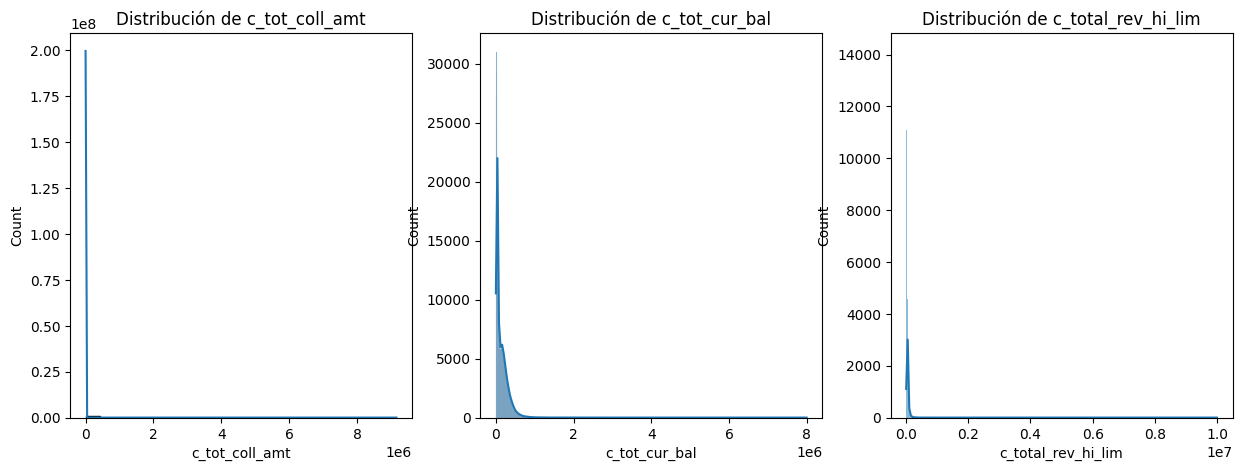

In [178]:
#hacemos gráficos para ver la distribución de los datos  en 'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim'

import matplotlib.pyplot as plt
# Histogramas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df2, x="c_tot_coll_amt", kde=True)
plt.title("Distribución de c_tot_coll_amt")

plt.subplot(1, 3, 2)
sns.histplot(data=df2, x="c_tot_cur_bal", kde=True)
plt.title("Distribución de c_tot_cur_bal")

plt.subplot(1, 3, 3)
sns.histplot(data=df2, x="c_total_rev_hi_lim", kde=True)
plt.title("Distribución de c_total_rev_hi_lim")

plt.show()


- Podemos ver que estas 3 columnas tienen outliers y no tienen distribución normal de los datos. Entonces los valores faltantes serán imputados según la mediana.

In [179]:
#Imputamos con SimpleImputer los datos faltantes en 'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim' usando la mediana

import numpy as np
from sklearn.impute import SimpleImputer

# Imputamos los datos faltantes con la mediana
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Imputamos las columnas especificadas
df2['c_tot_coll_amt'] = imputer.fit_transform(df2['c_tot_coll_amt'].values.reshape(-1, 1))
df2['c_tot_cur_bal'] = imputer.fit_transform(df2['c_tot_cur_bal'].values.reshape(-1, 1))
df2['c_total_rev_hi_lim'] = imputer.fit_transform(df2['c_total_rev_hi_lim'].values.reshape(-1, 1))

In [180]:
porcentaje_faltantes = df2.isnull().mean() * 100
columnas_con_faltantes = porcentaje_faltantes[porcentaje_faltantes > 0]
print(columnas_con_faltantes.sort_values(ascending=True))

c_annual_inc                    0.000451
c_delinq_2yrs                   0.003268
c_inq_last_6mths                0.003268
c_open_acc                      0.003268
c_pub_rec                       0.003268
c_total_acc                     0.003268
c_acc_now_delinq                0.003268
c_collections_12_mths_ex_med    0.016340
title                           0.017242
c_revol_util                    0.056571
d_emp_length                    5.051393
emp_title                       5.799326
dtype: float64


- Es el turno de las variables 'd_emp_lenght' y 'emp_title'.
- 'emp_title' tiene un porcentaje de datos faltantes bajo (<5.8%) y es una variable categórica. La moda es lo mejor para rellenar esos datos.
- 'd_emp_length' también tiene un porcentaje de datos faltantes bajo (<5.1%). Se revisará la presencia de outliers y la visualización de distribución para ver con que medida se completan los datos de la variable.

In [181]:
# completar los datos faltantes de la variable 'emp_title' con la moda
df2['emp_title'] = df2['emp_title'].fillna(df2['emp_title'].mode()[0])

In [182]:
#Valores en la variable 'd_emp_length'
df2['d_emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

- 'd_emp_length' tiene valores categóricos, pero es más útil si lo cambiamos a discretos.
- El valor '10+ years' es reemplazado por '10.0', el '<1 year' por '0.9' y 'nan' por '0.0
- Además, cambiamos el nombre de la columna, señalando que el valor corresponde a años (years).

In [183]:
#cambiar los valores de 'd_emp_title' de categórica a continua

df2['d_emp_length'] = df2['d_emp_length'].replace(['10+ years', '2 years', '< 1 year', '1 year', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', 'nan'],
                                                  [10.0, 2.0, 0.9, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 0.0])


In [184]:
#Cambiar el nombre de la columna 'd_emp_length'
df2 = df2.rename(columns={"d_emp_length": "d_emp_length_years"})

In [185]:
#ver la cantidad de outliers en 'd_emp_length_years'
def check_outliers(df2, columns):
  for column in columns:
    # calculamos el IQR
    q1 = df2[column].quantile(0.25)
    q3 = df2[column].quantile(0.75)
    iqr = q3 - q1

    # definimos los limites inferior y superior de los outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    #conteo del numero de outliers Count
    outliers = df2[~((df2[column] >= lower_bound) & (df2[column] <= upper_bound))].shape[0]

    # vemos los rersultados
    print(f"Column: {column}, Number of outliers: {outliers}")

# chequeamos los outliers en las columnas especificas
check_outliers(df2, ['d_emp_length_years'])


Column: d_emp_length_years, Number of outliers: 44825


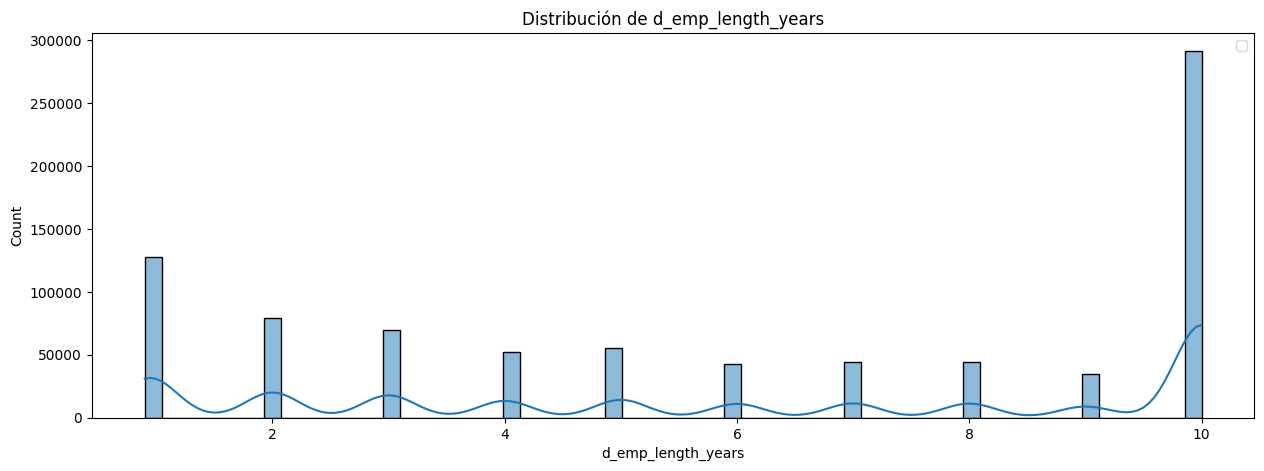

In [186]:
#hacemos gráficos para ver la distribución de los datos en 'd_emp_length_years'

# Histogramas
plt.figure(figsize=(15, 5))

plt.subplot(1, 1, 1)
sns.histplot(data=df2, x="d_emp_length_years", kde=True)
plt.legend ()
plt.title("Distribución de d_emp_length_years")

plt.show()


- Como tiene outliers y no tiene distribucuón normal, vamos a usar la mediana de 'd_emp_length_years'.

In [187]:
# Imputamos los datos faltantes con la mediana
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Imputamos las columnas especificadas
df2['d_emp_length_years'] = imputer.fit_transform(df2['d_emp_length_years'].values.reshape(-1, 1))


In [188]:
porcentaje_faltantes = df2.isnull().mean() * 100
columnas_con_faltantes = porcentaje_faltantes[porcentaje_faltantes > 0]
print(columnas_con_faltantes.sort_values(ascending=True))

c_annual_inc                    0.000451
c_delinq_2yrs                   0.003268
c_inq_last_6mths                0.003268
c_open_acc                      0.003268
c_pub_rec                       0.003268
c_total_acc                     0.003268
c_acc_now_delinq                0.003268
c_collections_12_mths_ex_med    0.016340
title                           0.017242
c_revol_util                    0.056571
dtype: float64


- En este listado de variables donde se encuentran las columnas que nos quedan con resultados faltantes podemos ver que ese porcentaje es muy menor. Cualquier decisión que se tome para completar las columnas tendrá un impacto prácticamente nulo en nuestra información.

- Las columnas serán completadas usando la media, salvo 'title' que al ser categórica vamos usar la palabra "Desconocido".

In [189]:
# Imputar los valores faltates de la columna 'title' con la palabra "Desconocido"
df2['title'] = df2['title'].fillna("Desconocido")

In [190]:
#imputar las columnas a elección con su media correspondiente a cada columna

import numpy as np
# Imputamos los datos faltantes con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Imputamos las columnas especificadas
df2['c_annual_inc'] = imputer.fit_transform(df2['c_annual_inc'].values.reshape(-1, 1))
df2['c_delinq_2yrs'] = imputer.fit_transform(df2['c_delinq_2yrs'].values.reshape(-1, 1))
df2['c_inq_last_6mths'] = imputer.fit_transform(df2['c_inq_last_6mths'].values.reshape(-1, 1))
df2['c_open_acc'] = imputer.fit_transform(df2['c_open_acc'].values.reshape(-1, 1))
df2['c_pub_rec'] = imputer.fit_transform(df2['c_pub_rec'].values.reshape(-1, 1))
df2['c_total_acc'] = imputer.fit_transform(df2['c_total_acc'].values.reshape(-1, 1))
df2['c_acc_now_delinq'] = imputer.fit_transform(df2['c_acc_now_delinq'].values.reshape(-1, 1))
df2['c_collections_12_mths_ex_med'] = imputer.fit_transform(df2['c_collections_12_mths_ex_med'].values.reshape(-1, 1))
df2['c_revol_util'] = imputer.fit_transform(df2['c_revol_util'].values.reshape(-1, 1))

In [191]:
#Verificamos la completitud de "df2"
completitud = pd.DataFrame(df2.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total_dfaltantes"})
completitud["completitud"] = (1 - completitud["total_dfaltantes"] / df2.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total_dfaltantes,completitud
0,c_loan_amnt,0,100.0
1,c_revol_util,0,100.0
2,c_total_acc,0,100.0
3,initial_list_status,0,100.0
4,c_out_prncp,0,100.0
5,c_out_prncp_inv,0,100.0
6,c_total_pymnt,0,100.0
7,c_total_pymnt_inv,0,100.0
8,c_revol_bal,0,100.0
9,c_total_rec_prncp,0,100.0


- Nuestro dataset "df4" tiene una completitud del 100% en todas sus 40 variables.

- Ahora vamos a proceder a identificar y modificar valores atípicos (outliers).



In [192]:
#Llevar la columnas categoricas de 'df2' a un nuevo dataset, borrandolas de 'df2'
df2_cat = df2[df2.select_dtypes(include='object').columns]
df2_num = df2.drop(df2.select_dtypes(include='object').columns, axis=1)

In [193]:
df2_cat.head()

,grade,sub_grade,emp_title,home_ownership,obj_loan_status,purpose,title,initial_list_status
0,B,B2,Teacher,RENT,Fully Paid,credit_card,Computer,f
1,C,C4,Ryder,RENT,Charged Off,car,bike,f
2,C,C5,Teacher,RENT,Fully Paid,small_business,real estate business,f
3,C,C1,AIR RESOURCES BOARD,RENT,Fully Paid,other,personel,f
4,B,B5,University Medical Group,RENT,Current,other,Personal,f


In [194]:
df2_num.head()

,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,d_term_months,c_int_rate,c_installment,d_emp_length_years,c_annual_inc,c_dti,c_delinq_2yrs,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
0,5000.0,5000.0,4975.0,36,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,80559.0,23700.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,0.9,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,80559.0,23700.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,80559.0,23700.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,80559.0,23700.0
4,3000.0,3000.0,3000.0,60,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,80559.0,23700.0


In [195]:
# calcular el 'iqr' para cada una de las variables en 'df2_num'

iqr_df = df2_num.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# mostrar resutados en forma de listado
print(iqr_df)


c_loan_amnt                      12000.000000
c_funded_amnt                    12000.000000
c_funded_amnt_inv                12000.000000
d_term_months                       24.000000
c_int_rate                           6.210000
c_installment                      311.895000
d_emp_length_years                   7.000000
c_annual_inc                     45000.000000
c_dti                               12.040000
c_delinq_2yrs                        0.000000
c_inq_last_6mths                     1.000000
c_open_acc                           6.000000
c_pub_rec                            0.000000
c_revol_bal                      14386.000000
c_revol_util                        35.900000
c_total_acc                         15.000000
c_out_prncp                      13659.055000
c_out_prncp_inv                  13654.050000
c_total_pymnt                     8702.224231
c_total_pymnt_inv                 8665.990000
c_total_rec_prncp                 6799.430000
c_total_rec_int                   

In [196]:
# reemplazar los outliers por el limite superior o inferior de iqr, segun corresponda.

# definir el limite superior e inferior para cada variable
superior = df2_num.apply(lambda x: np.percentile(x, 75) + 1.5 * iqr_df[x.name])
inferior = df2_num.apply(lambda x: np.percentile(x, 25) - 1.5 * iqr_df[x.name])

# reemplazar los outliers por el limite superior o inferior de iqr, segun corresponda
for column in df2_num:
  df2_num[column] = np.where(df2_num[column] > superior[column], superior[column],
                            np.where(df2_num[column] < inferior[column], inferior[column], df2_num[column]))

# mostrar los primeros 5 registros del dataset
df2_num.head()


,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,d_term_months,c_int_rate,c_installment,d_emp_length_years,c_annual_inc,c_dti,c_delinq_2yrs,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.0,0.0,171.62,0.0,0.0,0.0,80559.0,23700.0
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,0.9,30000.0,1.00,0.0,2.5,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,0.0,0.0,119.66,0.0,0.0,0.0,80559.0,23700.0
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.0,0.0,649.91,0.0,0.0,0.0,80559.0,23700.0
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,0.0,0.0,0.0,357.48,0.0,0.0,0.0,80559.0,23700.0
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,0.0,0.0,80559.0,23700.0


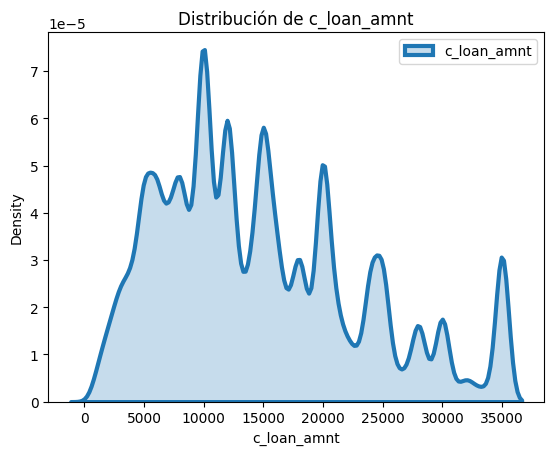

In [197]:
# Grafico para distribucion de datos de algunas variables
sns.distplot(df2_num['c_loan_amnt'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='c_loan_amnt')

plt.legend(loc='best')
plt.title('Distribución de c_loan_amnt')
plt.show()


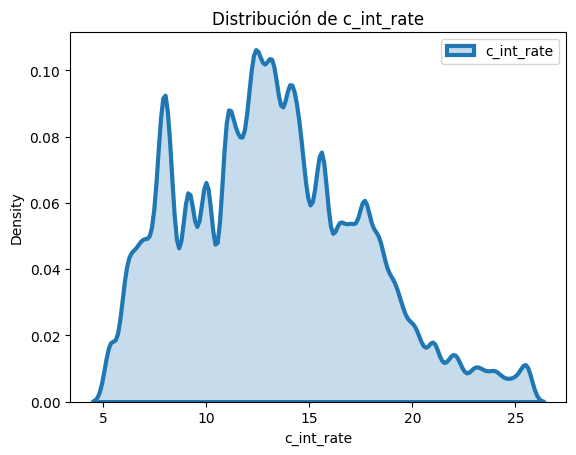

In [198]:
sns.distplot(df2_num['c_int_rate'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='c_int_rate')

plt.legend(loc='best')
plt.title('Distribución de c_int_rate')
plt.show()

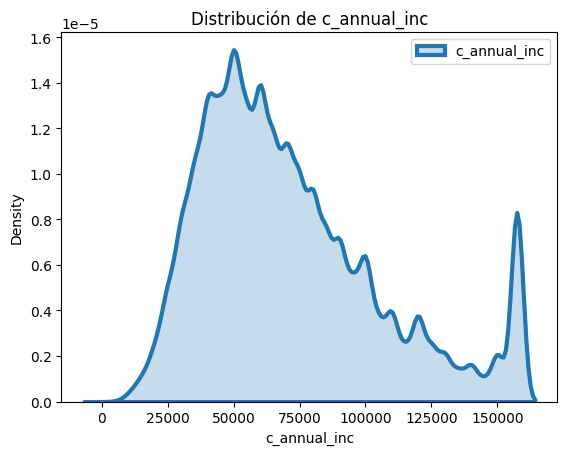

In [199]:
sns.distplot(df2_num['c_annual_inc'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='c_annual_inc')

plt.legend(loc='best')
plt.title('Distribución de c_annual_inc')
plt.show()

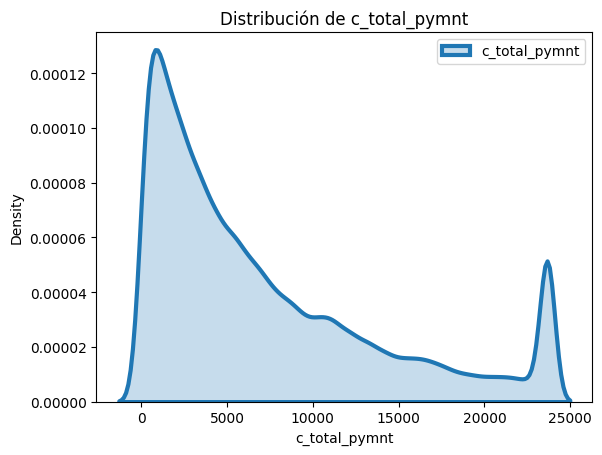

In [200]:
sns.distplot(df2_num['c_total_pymnt'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='c_total_pymnt')

plt.legend(loc='best')
plt.title('Distribución de c_total_pymnt')
plt.show()

## Parte 3
Usa un transformador o los transformadores necesarios y justifica tu elección.

- En los gráficos anteriores de algunas variables numéricas de 'df2' se puede ver que hay varias columnas con que no tienen una distribución normal de los datos. Hay bastantes outliers que fueron reemplazados por valores bajos y altos del IQR (preponderan los altos).
- Por lo tanto, "a priori" optamos por usar 'MinMaxScaler' para escalar nuestros datos.

In [201]:
#escalar los datos de 'df2_num' usando 'MinMaxScaler'

from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Escalar los datos numéricos
df2_num_scaled = scaler.fit_transform(df2_num)

# Convertir los datos escalados a un DataFrame
df2_num_scaled = pd.DataFrame(df2_num_scaled, columns=df2_num.columns)

# Mostrar los primeros 5 registros del DataFrame
df2_num_scaled.head()


,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,d_term_months,c_int_rate,c_installment,d_emp_length_years,c_annual_inc,c_dti,c_delinq_2yrs,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
0,0.130435,0.130435,0.142143,0.0,0.263927,0.143642,1.000000,0.152381,0.658177,0.0,0.4,0.130435,0.0,0.321826,0.656728,0.149533,0.000000,0.000000,0.247614,0.247480,0.274738,0.174536,0.0,0.0,0.0,0.103519,0.0,0.0,0.0,0.182625,0.327122
1,0.057971,0.057971,0.071429,1.0,0.492696,0.043092,0.000000,0.190476,0.023804,0.0,1.0,0.130435,0.0,0.039780,0.073754,0.056075,0.000000,0.000000,0.042615,0.042806,0.025081,0.088208,0.0,0.0,0.0,0.072177,0.0,0.0,0.0,0.182625,0.327122
2,0.055072,0.055072,0.068571,0.0,0.526863,0.067000,1.000000,0.077790,0.207570,0.0,0.8,0.086957,0.0,0.069704,0.772852,0.168224,0.000000,0.000000,0.126896,0.127464,0.131874,0.122358,0.0,0.0,0.0,0.392018,0.0,0.0,0.0,0.182625,0.327122
3,0.275362,0.275362,0.285714,0.0,0.404556,0.315816,1.000000,0.312381,0.476077,0.0,0.4,0.434783,0.0,0.132003,0.164770,0.672897,0.000000,0.000000,0.516528,0.518840,0.549476,0.447825,0.0,0.0,0.0,0.215628,0.0,0.0,0.0,0.182625,0.327122
4,0.072464,0.072464,0.085714,1.0,0.364942,0.050860,0.010989,0.507937,0.427041,0.0,0.0,0.652174,0.0,0.655136,0.422911,0.691589,0.022458,0.022467,0.136973,0.137586,0.122704,0.204535,0.0,0.0,0.0,0.040890,0.0,0.0,0.0,0.182625,0.327122


In [202]:
#crear un nuevo dataset solo con la columna 'obj_loan_status'
df2_loan_status = df2['obj_loan_status']

In [203]:
#quitar la variable 'obj_loan_status' de 'df2_cat'

df2_cat = df2_cat.drop('obj_loan_status', axis=1)


- Hemos dejado nuestra variable objetivo 'obj_loan_status' en un dataset propio, ya que debe llegar a nuestro modelo lo más intacto posible.

In [204]:
df2_cat[:40]

,grade,sub_grade,emp_title,home_ownership,purpose,title,initial_list_status
0,B,B2,Teacher,RENT,credit_card,Computer,f
1,C,C4,Ryder,RENT,car,bike,f
2,C,C5,Teacher,RENT,small_business,real estate business,f
3,C,C1,AIR RESOURCES BOARD,RENT,other,personel,f
4,B,B5,University Medical Group,RENT,other,Personal,f
5,A,A4,Veolia Transportaton,RENT,wedding,My wedding loan I promise to pay back,f
6,C,C5,Southern Star Photography,RENT,debt_consolidation,Loan,f
7,E,E1,MKC Accounting,RENT,car,Car Downpayment,f
8,F,F2,Teacher,OWN,small_business,Expand Business & Buy Debt Portfolio,f
9,B,B5,Starbucks,RENT,other,Building my credit history.,f


- Las variables categóricas debemos separarlas entre variables ordinales y nominales, porque van a usar distintos transformadores.

- Ordinales: grade, sub_grade (indican distintos grados de riesgo del préstamo)
- nominales: emp_title, home_ownership, purpose, title, initial_list_status.

In [205]:
#hacer un nuevo dataset con 'grade' y 'sub_grade' extraidos de 'df2_cat'

df2_cat_ord = df2_cat[['grade', 'sub_grade']]
df2_cat_ord.head()


,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5


In [206]:
# eliminar 'grade' y 'sub_grade' del dataset 'df2_cat'

df2_cat = df2_cat.drop(['grade', 'sub_grade'], axis=1)
df2_cat.head()


,emp_title,home_ownership,purpose,title,initial_list_status
0,Teacher,RENT,credit_card,Computer,f
1,Ryder,RENT,car,bike,f
2,Teacher,RENT,small_business,real estate business,f
3,AIR RESOURCES BOARD,RENT,other,personel,f
4,University Medical Group,RENT,other,Personal,f


In [207]:
df2_cat_nom = df2_cat

- En nuestro dataset de variables nominales "df2_cat_nom" es necesario eliminar las variables 'emp_title' y 'title' ya que son datos muy diversos que nos generan un problema de capacidad con el procesado cuando le apliquemos "One-Hot Encoding", incluso cuando aplicamos '.toarray ()'

In [208]:
# Eliminar las variables 'emp_title' y 'title' en el dataset 'df2_cat_nom'

df2_cat_nom = df2_cat_nom.drop(['emp_title','title'], axis=1)


In [209]:
#hacer labelencoder a 'df2_cat_ord'

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df2_cat_ord.columns:
    df2_cat_ord[col] = le.fit_transform(df2_cat_ord[col])

In [210]:
print(df2_cat_ord.head())

   grade  sub_grade
0      1          6
1      2         13
2      2         14
3      2         10
4      1          9


In [211]:
#hacer 'One-Hot Encoding' al dataset 'df2_cat_nom'

from sklearn.preprocessing import OneHotEncoder
# crear una instancia de OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# aplicar OneHotEncoder a cada columna del DataFrame
df2_cat_nom = ohe.fit_transform(df2_cat_nom)

# convertir el array de numpy a un DataFrame
df2_cat_nom = pd.DataFrame(df2_cat_nom, columns=ohe.get_feature_names_out())

# mostrar los primeros 5 registros del DataFrame
df2_cat_nom.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [212]:
#concatenar 'df2_cat_nom', 'df2_cat_ord', 'df2_cat_nom'

import pandas as pd
df_concat = pd.concat([df2_num_scaled, df2_cat_ord, df2_cat_nom], axis=1)


## Parte 4

Selecciona la mejor técnica para reducir las dimensiones y justifica por qué debe reducirse. Se recomienda indicar el número de dimensiones óptimo.

> Recuerda incluir en tu análisis los gráficos adecuados para comunicar lo que deseas expresar. Para favorecer tu entendimiento del programa, se sugiere el uso de comentarios (#) en cada bloque de código.



In [213]:
df_concat.head()

,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,d_term_months,c_int_rate,c_installment,d_emp_length_years,c_annual_inc,c_dti,c_delinq_2yrs,c_inq_last_6mths,c_open_acc,c_pub_rec,c_revol_bal,c_revol_util,c_total_acc,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim,grade,sub_grade,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,0.130435,0.130435,0.142143,0.0,0.263927,0.143642,1.000000,0.152381,0.658177,0.0,0.4,0.130435,0.0,0.321826,0.656728,0.149533,0.000000,0.000000,0.247614,0.247480,0.274738,0.174536,0.0,0.0,0.0,0.103519,0.0,0.0,0.0,0.182625,0.327122,1,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.057971,0.057971,0.071429,1.0,0.492696,0.043092,0.000000,0.190476,0.023804,0.0,1.0,0.130435,0.0,0.039780,0.073754,0.056075,0.000000,0.000000,0.042615,0.042806,0.025081,0.088208,0.0,0.0,0.0,0.072177,0.0,0.0,0.0,0.182625,0.327122,2,13,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.055072,0.055072,0.068571,0.0,0.526863,0.067000,1.000000,0.077790,0.207570,0.0,0.8,0.086957,0.0,0.069704,0.772852,0.168224,0.000000,0.000000,0.126896,0.127464,0.131874,0.122358,0.0,0.0,0.0,0.392018,0.0,0.0,0.0,0.182625,0.327122,2,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.275362,0.275362,0.285714,0.0,0.404556,0.315816,1.000000,0.312381,0.476077,0.0,0.4,0.434783,0.0,0.132003,0.164770,0.672897,0.000000,0.000000,0.516528,0.518840,0.549476,0.447825,0.0,0.0,0.0,0.215628,0.0,0.0,0.0,0.182625,0.327122,2,10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.072464,0.072464,0.085714,1.0,0.364942,0.050860,0.010989,0.507937,0.427041,0.0,0.0,0.652174,0.0,0.655136,0.422911,0.691589,0.022458,0.022467,0.136973,0.137586,0.122704,0.204535,0.0,0.0,0.0,0.040890,0.0,0.0,0.0,0.182625,0.327122,1,9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


- Vamos a eliminar todas las variables que tienen desviación estándar de 0, porque otorgan una baja varianza.

In [214]:
#eliminar las variables de 'df_concat' que tienen un valor de 'std' igual a '0.0'

df_concat = df_concat.loc[:, (df_concat.std() != 0)]


In [215]:
df_concat.describe().round(2)

,c_loan_amnt,c_funded_amnt,c_funded_amnt_inv,d_term_months,c_int_rate,c_installment,d_emp_length_years,c_annual_inc,c_dti,c_inq_last_6mths,c_open_acc,c_revol_bal,c_revol_util,c_total_acc,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_last_pymnt_amnt,c_tot_cur_bal,c_total_rev_hi_lim,grade,sub_grade,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
count,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.0,887379.0,887379.00,887379.00,887379.0,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00
mean,0.41,0.41,0.42,0.30,0.39,0.41,0.57,0.45,0.43,0.25,0.50,0.36,0.43,0.45,0.25,0.25,0.30,0.30,0.29,0.32,0.39,0.29,0.40,1.80,10.96,0.0,0.5,0.00,0.00,0.1,0.40,0.01,0.23,0.59,0.00,0.06,0.00,0.02,0.01,0.01,0.05,0.00,0.01,0.01,0.00,0.51,0.49
std,0.24,0.24,0.24,0.46,0.22,0.23,0.38,0.22,0.20,0.33,0.21,0.27,0.19,0.21,0.25,0.25,0.28,0.28,0.30,0.29,0.32,0.28,0.26,1.31,6.49,0.0,0.5,0.01,0.01,0.3,0.49,0.10,0.42,0.49,0.02,0.23,0.06,0.14,0.10,0.08,0.21,0.03,0.11,0.07,0.05,0.50,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.22,0.22,0.23,0.00,0.23,0.24,0.23,0.29,0.28,0.00,0.35,0.15,0.30,0.30,0.00,0.00,0.08,0.08,0.07,0.09,0.17,0.07,0.20,1.00,6.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.36,0.36,0.37,0.00,0.38,0.36,0.56,0.41,0.42,0.00,0.48,0.28,0.44,0.43,0.19,0.19,0.21,0.21,0.18,0.22,0.28,0.18,0.33,2.00,10.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.57,0.57,0.57,1.00,0.54,0.54,1.00,0.57,0.57,0.40,0.61,0.49,0.58,0.58,0.40,0.40,0.45,0.45,0.44,0.45,0.50,0.44,0.52,3.00,15.00,0.0,1.0,0.00,0.00,0.0,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00,34.00,1.0,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [216]:
df_concat.shape

(887379, 47)

- A continuación, vamos a emplear el método de empaquetado "PCA" a nuestro dataset 'df_concat'.
- El objetivo general del PCA es disminuir dimensiones y tiempo de procesado, manteniendo la representatividad del dataframe original en nuestro modelo.

In [217]:
#Realizar empaquetado "PCA" al dataset 'df_concat'
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(df_concat)
df_concat_pca=pca.transform(df_concat)
df_concat_pca=pd.DataFrame(df_concat_pca, columns=pca.get_feature_names_out())
df_concat_pca.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 47 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pca0    887379 non-null  float64
 1   pca1    887379 non-null  float64
 2   pca2    887379 non-null  float64
 3   pca3    887379 non-null  float64
 4   pca4    887379 non-null  float64
 5   pca5    887379 non-null  float64
 6   pca6    887379 non-null  float64
 7   pca7    887379 non-null  float64
 8   pca8    887379 non-null  float64
 9   pca9    887379 non-null  float64
 10  pca10   887379 non-null  float64
 11  pca11   887379 non-null  float64
 12  pca12   887379 non-null  float64
 13  pca13   887379 non-null  float64
 14  pca14   887379 non-null  float64
 15  pca15   887379 non-null  float64
 16  pca16   887379 non-null  float64
 17  pca17   887379 non-null  float64
 18  pca18   887379 non-null  float64
 19  pca19   887379 non-null  float64
 20  pca20   887379 non-null  float64
 21  pca21   88

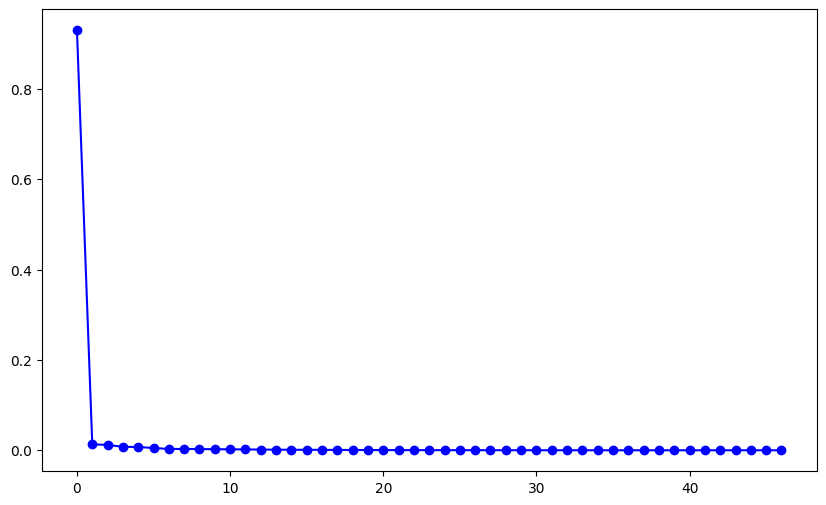

In [218]:
plt.figure(figsize=(10,6))
plt.plot(pca.explained_variance_ratio_,'bo-')
plt.show()

In [219]:
pca=PCA(0.9)
pca.fit(df_concat)
df_concat_pca=pca.transform(df_concat)
df_concat_pca=pd.DataFrame(df_concat_pca, columns=pca.get_feature_names_out())
df_concat_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pca0    887379 non-null  float64
dtypes: float64(1)
memory usage: 6.8 MB


- Si bien despues de nuestro fitrado 'PCA', el dataset 'df_concat' quedó con la misma cantidad de variables (47), logramos concentrar en una sola variable (pca0) más del 90% de nuestra información.

- Por lo tanto, nuestra variable objetivo 'obj_loan_status" puede trabajar con una sola columna (pca0), disminuyendo considerablemente las dimensiones en comparación a todas las variables que la acompañaban antes.